In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from google.colab import drive                       #This is to import the datasets which are uploaded to Google drive
drive.mount('/content/drive')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
Df = pd.read_csv('/content/drive/MyDrive/Datasets/Hotel booking demand dataset/hotel_bookings.csv')

In [3]:
Df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
Df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

# Handling NULL values and EDA:

In [7]:
Df.duplicated().sum()

np.int64(31994)

So, there are 31994 duplicate rows. Let's drop them.

In [8]:
Df.drop_duplicates(keep='first',inplace=True)

In [9]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


In [10]:
Df['children'] = Df['children'].fillna(Df['children'].mode().iloc[0])
#Mode and Median of children column is zero

In [11]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Agent and company columns have NULL values but these values do not represent lack of any value rather they mean "Not Applicable" (described in dataset description). We should impute these null values with an appropriate value describing the same.

<Axes: ylabel='Frequency'>

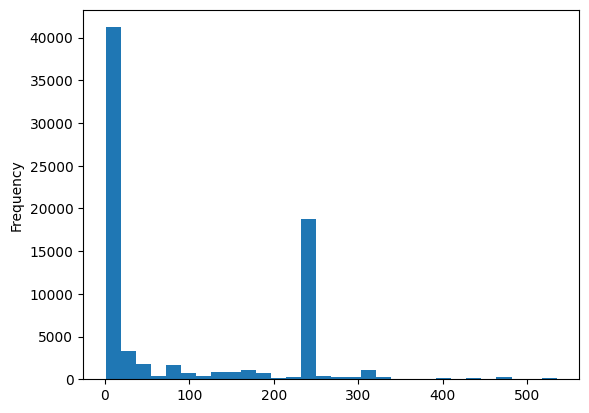

In [12]:
Df['agent'].plot(kind='hist',bins=30)

In [13]:
(Df['agent'] == -1).any()

np.False_

So, the agent colunmn does not have any code equal to -1 as all the codes are positive. We can impute the NULL values with -1 to indicate that no agent was present for the booking.

In [14]:
Df['agent'] = Df['agent'].fillna(-1)

In [15]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


We follow the same imputation procedure for "company" column.

<Axes: ylabel='Frequency'>

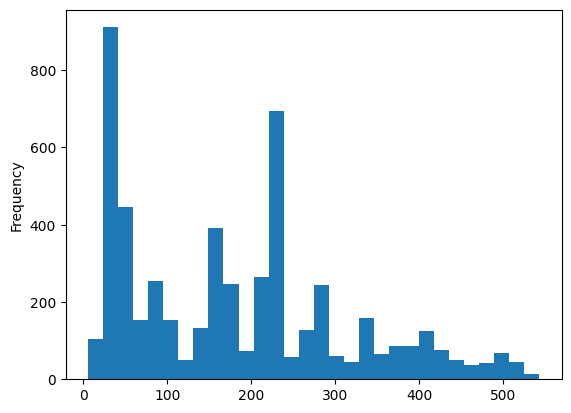

In [16]:
Df['company'].plot(kind='hist',bins=30)

In [17]:
(Df['company'] == -1).any()

np.False_

In [18]:
Df['company'] = Df['company'].fillna(-1)

In [19]:
Df[numerical_features].isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


Now, that null values are handled in numerical features, let's check the same in Categorical features now.

In [20]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,452
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


488 rows reflect approximately 0.4% of the data. We need to impute the null values with a reasonable imputation value. By common sense, let's take the mode of 'country'column and impute it.

In [21]:
Df['country'] = Df['country'].fillna(Df['country'].mode().iloc[0])

In [22]:
Df[categorical_features].isnull().sum()

,0
hotel,0
arrival_date_month,0
meal,0
country,0
market_segment,0
distribution_channel,0
reserved_room_type,0
assigned_room_type,0
deposit_type,0
customer_type,0


In [23]:
Df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Steps to control leakage:


In [24]:
Df.drop(['reservation_status'],axis=1,inplace=True)

In [25]:
Df.drop(['reservation_status_date'],axis=1,inplace=True)

In [26]:
Df.drop(['previous_cancellations'],axis=1,inplace=True)

In [27]:
Df.drop(['previous_bookings_not_canceled'],axis=1,inplace=True)

In [28]:
Df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [29]:
#Removing the target variable before scaling
target_series = Df['is_canceled']
Df.drop(['is_canceled'],axis=1,inplace=True)

# Scaling numerical features:

In [30]:
numerical_features = Df.select_dtypes(exclude=['object']).columns
categorical_features = Df.select_dtypes(include=['object']).columns

In [31]:
numerical_features = numerical_features.drop(['is_repeated_guest'])

# is_repeated_guest is a boolean numerical feature, it will not require scaling.

In [32]:
Df[numerical_features]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,3,-1.0,-1.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,4,-1.0,-1.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,-1.0,-1.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,304.0,-1.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,240.0,-1.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,394.0,-1.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,9.0,-1.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,9.0,-1.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,89.0,-1.0,0,104.40,0,0


In [33]:
Df[numerical_features].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.271603,80.865143,10.076983,0.749565,106.337246,0.084226,0.698567
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.727245,110.048927,54.239239,10.015731,55.013953,0.281533,0.831946
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,72.000000,0.000000,0.000000
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,98.100000,0.000000,0.000000
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,234.000000,-1.000000,0.000000,134.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
Df[numerical_features] = scaler.fit_transform(Df[numerical_features])

In [36]:
Df[numerical_features].max()

,0
lead_time,1.0
arrival_date_year,1.0
arrival_date_week_number,1.0
arrival_date_day_of_month,1.0
stays_in_weekend_nights,1.0
stays_in_week_nights,1.0
adults,1.0
children,1.0
babies,1.0
booking_changes,1.0


In [37]:
Df[numerical_features].min()

,0
lead_time,0.0
arrival_date_year,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0
children,0.0
babies,0.0
booking_changes,0.0


# Encoding categorical features

In [38]:
Df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


None of the categorical features seem to have an ordinal relationship as far as predicting booking cancellations is concerned. Let's explore the cardinality of all features.

In [39]:
#Determining the cardinality of all categorical features:

for i in categorical_features:
  print (f"{i} = {Df[i].nunique()}")

hotel = 2
arrival_date_month = 12
meal = 5
country = 177
market_segment = 8
distribution_channel = 5
reserved_room_type = 10
assigned_room_type = 12
deposit_type = 3
customer_type = 4


In [40]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()
Df[categorical_features] = encoder.fit_transform(Df[categorical_features],target_series)

In [41]:
Df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0.235910,0.318414,0.265296,0.353486,0.147164,0.148035,0.337386,0.184967,0.266996,0.301325
1,0.234117,0.320261,0.265625,0.350723,0.146973,0.148138,0.313213,0.178382,0.266653,0.300784
2,0.235536,0.318928,0.265384,0.190935,0.149197,0.149404,0.259896,0.179439,0.266769,0.300763
3,0.234117,0.320261,0.265625,0.193225,0.119918,0.126008,0.258872,0.305430,0.266653,0.300784
4,0.233719,0.318017,0.266010,0.189962,0.353336,0.309443,0.259442,0.305758,0.266991,0.301173
...,...,...,...,...,...,...,...,...,...,...
119385,0.300939,0.321530,0.265625,0.194283,0.149412,0.309635,0.258872,0.305430,0.266653,0.300784
119386,0.300428,0.323442,0.265100,0.193258,0.353385,0.310151,0.270210,0.232981,0.266836,0.301246
119387,0.299667,0.319068,0.265296,0.194290,0.354137,0.309760,0.302691,0.242767,0.266996,0.301325
119388,0.300939,0.321530,0.265625,0.193225,0.353335,0.309635,0.258872,0.305430,0.266653,0.300784


In [42]:
#Checking the range of categorical features after Target encoding
Df[categorical_features].max() - Df[categorical_features].min()

,0
hotel,0.067338
arrival_date_month,0.115772
meal,0.194755
country,1.000000
market_segment,0.884649
distribution_channel,0.875477
reserved_room_type,0.789639
assigned_room_type,0.992974
deposit_type,0.738020
customer_type,0.212719


In [43]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  float64
 1   lead_time                    87396 non-null  float64
 2   arrival_date_year            87396 non-null  float64
 3   arrival_date_month           87396 non-null  float64
 4   arrival_date_week_number     87396 non-null  float64
 5   arrival_date_day_of_month    87396 non-null  float64
 6   stays_in_weekend_nights      87396 non-null  float64
 7   stays_in_week_nights         87396 non-null  float64
 8   adults                       87396 non-null  float64
 9   children                     87396 non-null  float64
 10  babies                       87396 non-null  float64
 11  meal                         87396 non-null  float64
 12  country                      87396 non-null  float64
 13  market_segment      

In [44]:
Df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0.235910,0.464043,0.0,0.318414,0.500000,0.000000,0.000000,0.00,0.036364,0.0,...,0.184967,0.142857,0.266996,0.000000,0.0,0.0,0.301325,0.001180,0.0,0.0
1,0.234117,1.000000,0.0,0.320261,0.500000,0.000000,0.000000,0.00,0.036364,0.0,...,0.178382,0.190476,0.266653,0.000000,0.0,0.0,0.300784,0.001180,0.0,0.0
2,0.235536,0.009498,0.0,0.318928,0.500000,0.000000,0.000000,0.02,0.018182,0.0,...,0.179439,0.000000,0.266769,0.000000,0.0,0.0,0.300763,0.015053,0.0,0.0
3,0.234117,0.017639,0.0,0.320261,0.500000,0.000000,0.000000,0.02,0.018182,0.0,...,0.305430,0.000000,0.266653,0.569030,0.0,0.0,0.300784,0.015053,0.0,0.0
4,0.233719,0.018996,0.0,0.318017,0.500000,0.000000,0.000000,0.04,0.036364,0.0,...,0.305758,0.000000,0.266991,0.449627,0.0,0.0,0.301173,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.300939,0.031208,1.0,0.321530,0.653846,0.966667,0.105263,0.10,0.036364,0.0,...,0.305430,0.000000,0.266653,0.736940,0.0,0.0,0.300784,0.018963,0.0,0.0
119386,0.300428,0.138399,1.0,0.323442,0.653846,1.000000,0.105263,0.10,0.054545,0.0,...,0.232981,0.000000,0.266836,0.018657,0.0,0.0,0.301246,0.042877,0.0,0.4
119387,0.299667,0.046133,1.0,0.319068,0.653846,1.000000,0.105263,0.10,0.036364,0.0,...,0.242767,0.000000,0.266996,0.018657,0.0,0.0,0.301325,0.030351,0.0,0.8
119388,0.300939,0.147897,1.0,0.321530,0.653846,1.000000,0.105263,0.10,0.036364,0.0,...,0.305430,0.000000,0.266653,0.167910,0.0,0.0,0.300784,0.020491,0.0,0.0


In [49]:
#Resetting index column
Df.reset_index(inplace=True)

In [50]:
Df

,index,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0.235910,0.464043,0.0,0.318414,0.500000,0.000000,0.000000,0.00,0.036364,...,0.184967,0.142857,0.266996,0.000000,0.0,0.0,0.301325,0.001180,0.0,0.0
1,1,0.234117,1.000000,0.0,0.320261,0.500000,0.000000,0.000000,0.00,0.036364,...,0.178382,0.190476,0.266653,0.000000,0.0,0.0,0.300784,0.001180,0.0,0.0
2,2,0.235536,0.009498,0.0,0.318928,0.500000,0.000000,0.000000,0.02,0.018182,...,0.179439,0.000000,0.266769,0.000000,0.0,0.0,0.300763,0.015053,0.0,0.0
3,3,0.234117,0.017639,0.0,0.320261,0.500000,0.000000,0.000000,0.02,0.018182,...,0.305430,0.000000,0.266653,0.569030,0.0,0.0,0.300784,0.015053,0.0,0.0
4,4,0.233719,0.018996,0.0,0.318017,0.500000,0.000000,0.000000,0.04,0.036364,...,0.305758,0.000000,0.266991,0.449627,0.0,0.0,0.301173,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,0.300939,0.031208,1.0,0.321530,0.653846,0.966667,0.105263,0.10,0.036364,...,0.305430,0.000000,0.266653,0.736940,0.0,0.0,0.300784,0.018963,0.0,0.0
87392,119386,0.300428,0.138399,1.0,0.323442,0.653846,1.000000,0.105263,0.10,0.054545,...,0.232981,0.000000,0.266836,0.018657,0.0,0.0,0.301246,0.042877,0.0,0.4
87393,119387,0.299667,0.046133,1.0,0.319068,0.653846,1.000000,0.105263,0.10,0.036364,...,0.242767,0.000000,0.266996,0.018657,0.0,0.0,0.301325,0.030351,0.0,0.8
87394,119388,0.300939,0.147897,1.0,0.321530,0.653846,1.000000,0.105263,0.10,0.036364,...,0.305430,0.000000,0.266653,0.167910,0.0,0.0,0.300784,0.020491,0.0,0.0


# Splitting Training and testing data:

In [45]:
#Using x and y variable naming for training and test data for easier interpretation

x_train,x_test,y_train,y_test = train_test_split(Df,target_series,random_state=1,test_size=0.2)

In [46]:
x_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
29714,0.235536,0.017639,0.5,0.209566,0.846154,0.066667,0.000000,0.02,0.036364,0.0,...,0.306473,0.095238,0.266769,0.688433,0.0,0.0,0.152542,0.008209,0.0,0.2
35717,0.234774,0.020353,1.0,0.305670,0.307692,0.933333,0.000000,0.02,0.036364,0.0,...,0.307650,0.095238,0.266836,0.468284,0.0,0.0,0.301246,0.018752,0.0,0.0
8853,0.233719,0.331072,0.5,0.241615,0.807692,0.500000,0.105263,0.10,0.036364,0.0,...,0.232682,0.000000,0.266991,0.449627,0.0,0.0,0.301173,0.023376,0.0,0.2
21727,0.234117,0.000000,0.5,0.246717,0.192308,0.266667,0.000000,0.02,0.036364,0.0,...,0.241199,0.000000,0.266653,0.000000,0.0,0.0,0.300784,0.011353,0.0,0.2
93447,0.301057,0.134328,0.5,0.318017,0.557692,0.566667,0.052632,0.06,0.036364,0.0,...,0.305758,0.000000,0.266991,0.018657,0.0,0.0,0.301173,0.027399,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26215,0.235536,0.141113,0.5,0.318928,0.557692,0.700000,0.052632,0.04,0.072727,0.0,...,0.296810,0.285714,0.266769,0.011194,0.0,0.0,0.152542,0.047903,0.0,0.0
102640,0.300428,0.424695,0.5,0.267635,0.923077,0.000000,0.000000,0.06,0.036364,0.0,...,0.240334,0.000000,0.266836,0.018657,0.0,0.0,0.301246,0.018160,0.0,0.2
69750,0.301057,0.134328,1.0,0.301752,0.423077,0.133333,0.052632,0.06,0.036364,0.2,...,0.242007,0.000000,0.266991,0.018657,0.0,0.0,0.301173,0.047422,0.0,0.0
6994,0.235536,0.187246,0.5,0.318928,0.538462,0.500000,0.052632,0.02,0.036364,0.0,...,0.240656,0.000000,0.266769,0.449627,0.0,0.0,0.300763,0.035769,0.0,0.2


In [51]:
y_train

,is_canceled
29714,0
35717,0
8853,1
21727,0
93447,0
...,...
26215,0
102640,0
69750,1
6994,1


In [52]:
x_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
97875,0.299667,0.077341,0.5,0.245879,0.730769,0.666667,0.000000,0.02,0.036364,0.0,...,0.242767,0.000000,0.266996,0.014925,0.000000,0.0,0.301325,0.022459,0.0,0.4
44606,0.300939,0.284939,0.0,0.237701,0.769231,0.233333,0.052632,0.06,0.036364,0.0,...,0.242239,0.000000,0.266653,0.024254,0.000000,0.0,0.153040,0.014636,0.0,0.0
50472,0.300428,0.126187,0.5,0.290587,0.346154,0.033333,0.052632,0.00,0.036364,0.0,...,0.307650,0.000000,0.266836,0.018657,0.000000,0.0,0.301246,0.022655,0.0,0.0
27024,0.235910,0.351425,0.5,0.319068,0.615385,0.333333,0.105263,0.10,0.036364,0.0,...,0.305785,0.095238,0.266996,0.268657,0.000000,0.0,0.301325,0.021933,0.0,0.2
26883,0.235910,0.061058,0.5,0.319068,0.615385,0.333333,0.000000,0.06,0.036364,0.0,...,0.305785,0.000000,0.266996,0.449627,0.000000,0.0,0.301325,0.040578,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106905,0.300428,0.001357,1.0,0.242924,0.153846,0.100000,0.000000,0.02,0.036364,0.0,...,0.307650,0.000000,0.266836,0.018657,0.000000,0.0,0.301246,0.022821,0.0,0.0
55187,0.301057,0.215739,0.5,0.324109,0.615385,0.200000,0.105263,0.02,0.036364,0.1,...,0.305758,0.000000,0.266991,0.018657,0.000000,0.0,0.301173,0.025318,0.0,0.2
23439,0.235910,0.132972,0.5,0.305392,0.307692,0.633333,0.105263,0.08,0.036364,0.0,...,0.253981,0.000000,0.266996,0.453358,0.000000,0.0,0.301325,0.016384,0.0,0.2
79053,0.300939,0.000000,0.0,0.237701,0.807692,0.633333,0.000000,0.02,0.018182,0.0,...,0.223177,0.000000,0.266653,0.000000,0.150735,0.0,0.300784,0.023931,0.0,0.0


In [53]:
y_test

,is_canceled
97875,0
44606,1
50472,1
27024,0
26883,0
...,...
106905,0
55187,1
23439,0
79053,0


# Decision Tree algorithm: